# **Task 5 : Sales Price Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
import seaborn as sns

In [2]:
df=pd.read_csv('sales.csv')

# **Data Exploration**

In [3]:
print("Data Overview:")
print(df.head())

Data Overview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [4]:
# Check for null values
print("\nNull Values:")
print(df.isnull().sum())



Null Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# **Visualizations**

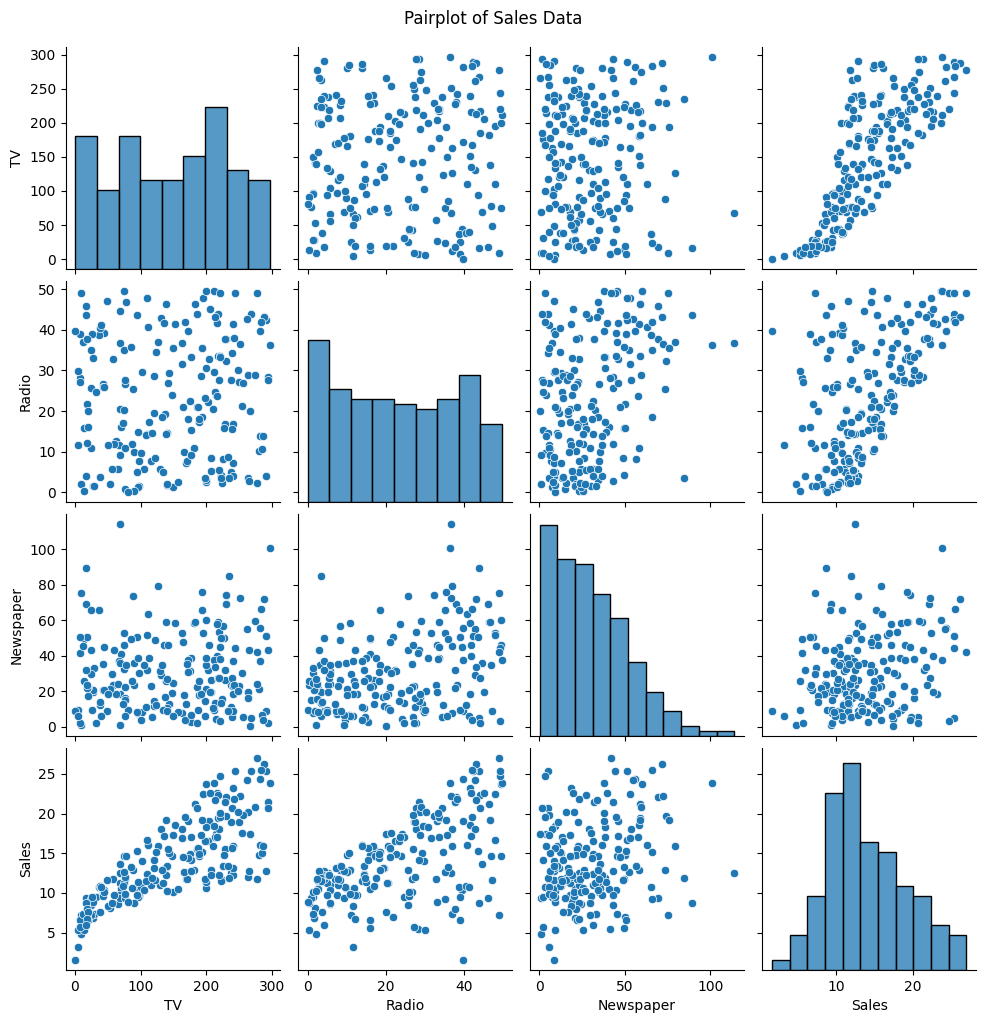

In [5]:
sns.pairplot(df)
plt.suptitle('Pairplot of Sales Data', y=1.02)
plt.show()

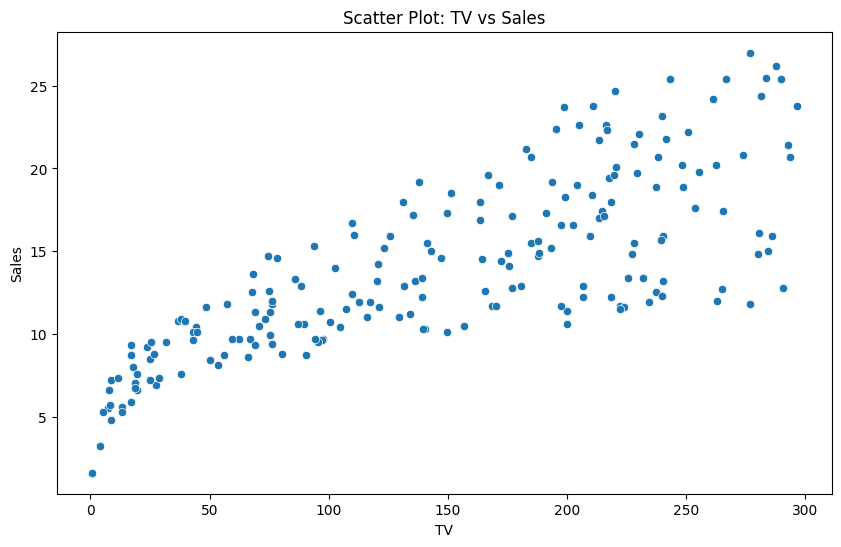

In [6]:
# Scatter plot for TV vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Scatter Plot: TV vs Sales')
plt.show()


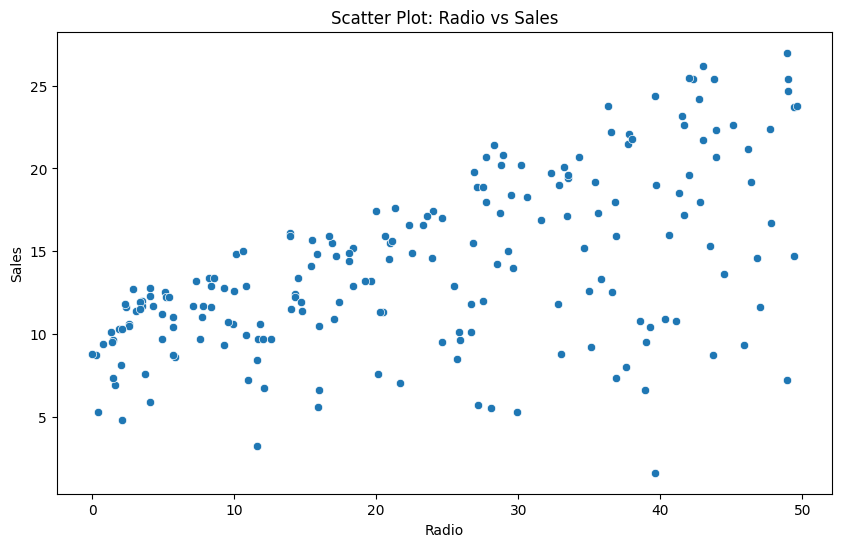

In [7]:
# Scatter plot for Radio vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Scatter Plot: Radio vs Sales')
plt.show()

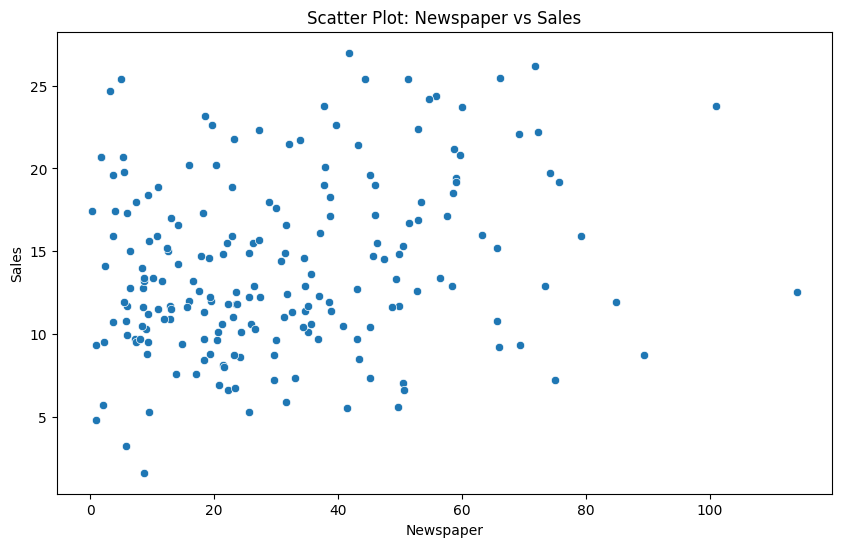

In [8]:

# Scatter plot for Newspaper vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Scatter Plot: Newspaper vs Sales')
plt.show()

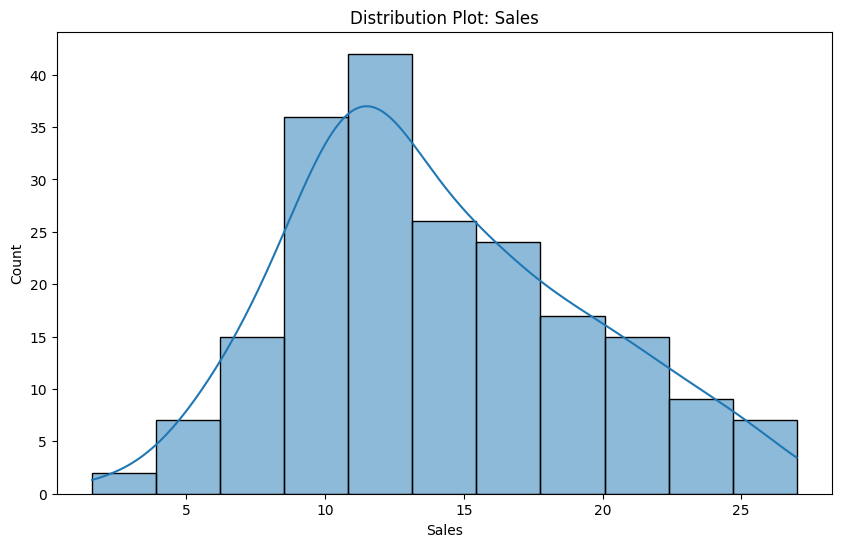

In [9]:
# Distribution plot for Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution Plot: Sales')
plt.show()

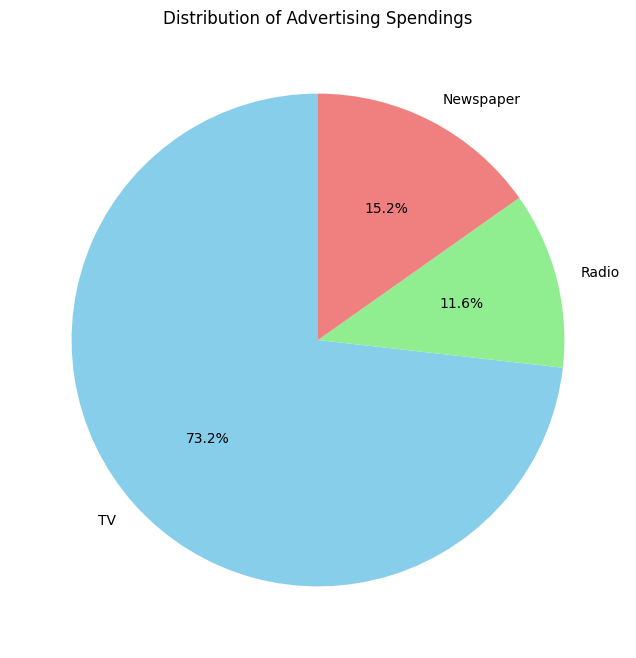

In [10]:
# Pie chart for the distribution of advertising channels
channels = ['TV', 'Radio', 'Newspaper']
total_spendings = [df['TV'].sum(), df['Radio'].sum(), df['Newspaper'].sum()]
plt.figure(figsize=(8, 8))
plt.pie(total_spendings, labels=channels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Advertising Spendings')
plt.show()


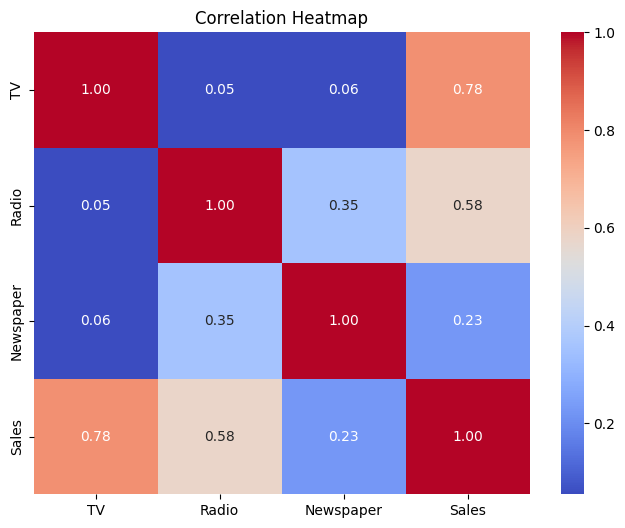

In [11]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing**

In [12]:
# Assuming 'Sales' is the target variable, and 'TV', 'Radio', 'Newspaper' are features
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training and Evaluation**


Linear Regression Evaluation:
Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912


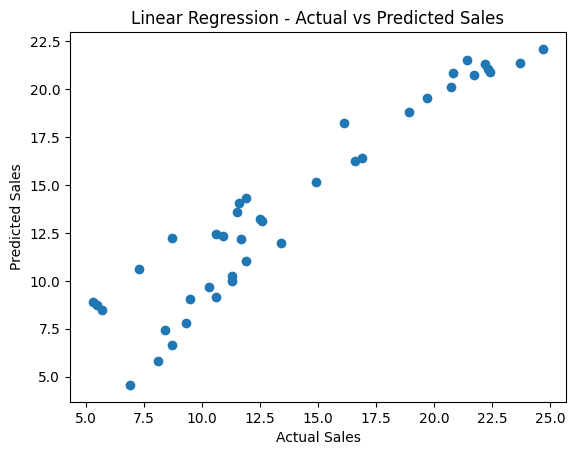


Decision Tree Evaluation:
Mean Squared Error: 2.2507499999999996
R2 Score: 0.9286915799947526


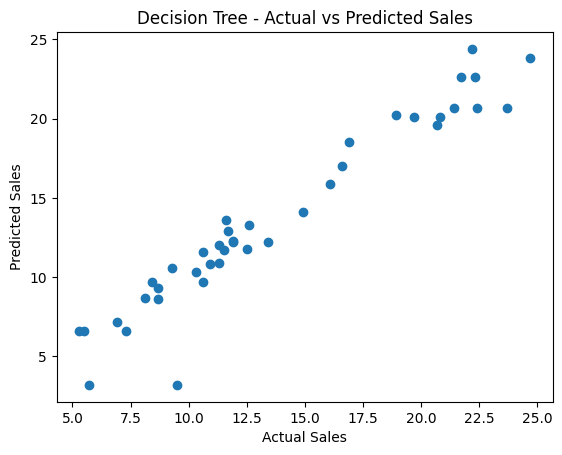


Random Forest Evaluation:
Mean Squared Error: 0.5090519999999976
R2 Score: 0.9838721786868773


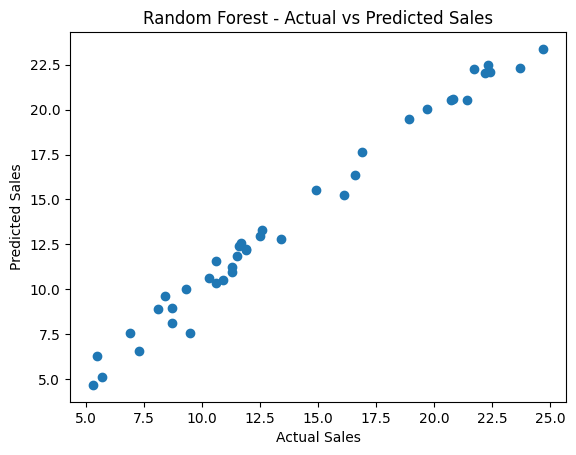


Support Vector Regression Evaluation:
Mean Squared Error: 4.00604540443217
R2 Score: 0.873080187377834


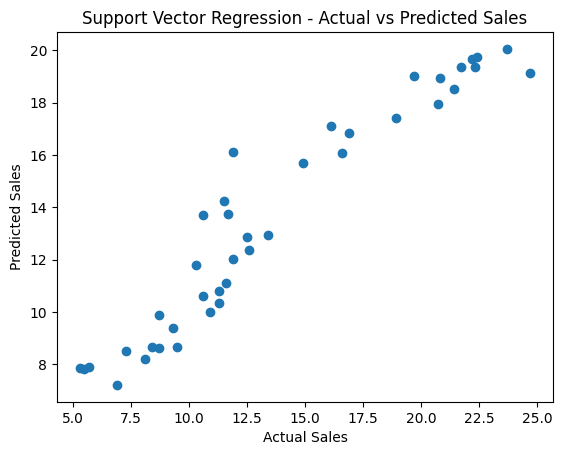

In [14]:
# Train different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR()
}

model_results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results.append([model_name, mse, r2])

    print(f"\n{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")

    # Visualize the results
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'{model_name} - Actual vs Predicted Sales')
    plt.show()


# **Model Comparison**


In [15]:
# Model Comparison Table
print("\nModel Comparison:")
print(tabulate(model_results, headers=["Model", "Mean Squared Error", "R2 Score"], tablefmt="grid"))



Model Comparison:
+---------------------------+----------------------+------------+
| Model                     |   Mean Squared Error |   R2 Score |
+===========================+======================+============+
| Linear Regression         |             3.1741   |   0.899438 |
+---------------------------+----------------------+------------+
| Decision Tree             |             2.25075  |   0.928692 |
+---------------------------+----------------------+------------+
| Random Forest             |             0.509052 |   0.983872 |
+---------------------------+----------------------+------------+
| Support Vector Regression |             4.00605  |   0.87308  |
+---------------------------+----------------------+------------+


In [16]:
# Identify the best model based on R2 Score
best_models = [model_name for model_name, mse, r2 in model_results if r2 == max(model_results, key=lambda x: x[2])[2]]
print("\nThe best model(s) based on R2 Score:")
for model_name in best_models:
    print(f"{model_name} (R2 Score: {max(model_results, key=lambda x: x[2])[2]:.4f})")



The best model(s) based on R2 Score:
Random Forest (R2 Score: 0.9839)
